## Vanacies Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data.csv", index_col=0)
df.head()

,location,experience,technologies
title,,,
Python Developer,"Київ, за кордоном, віддалено",< 1 року,"SQL, API, GCP, REST"
Junior Python розробник,"Київ, Дніпро, віддалено",< 1 року,"GIT, Pytest, docker, SQL, Flask, AWS"
🐍 Стажер Python Developer для УНКД 🐍,віддалено,< 1 року,API
Python Developer у Стартап,NaN,< 1 року,"API, backend, AI"
Python backend developer,віддалено,1…3 роки,"GIT, backend, GCP, Django, API, docker, FastAP..."


## Technology frequency analysis

# Overall frequency analysis

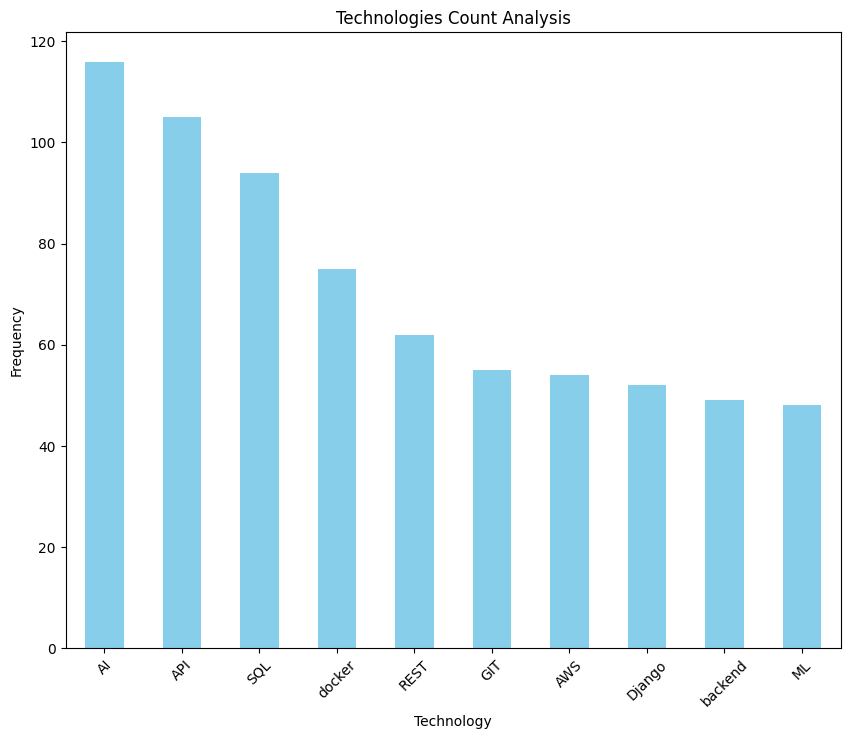

In [8]:
df["technologies"] = df["technologies"].astype(str)

technologies_list = df["technologies"].apply(lambda x: x.split(", ") if x else [])
non_empty_tech = technologies_list[technologies_list.apply(lambda x: len(x) > 0)]

technologies_count = pd.Series(np.concatenate(non_empty_tech.values)).value_counts()
technologies_data = technologies_count.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
technologies_data.head(10).plot(kind="bar", color="skyblue")
plt.title("Technologies Count Analysis")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Analysis for less than year experience

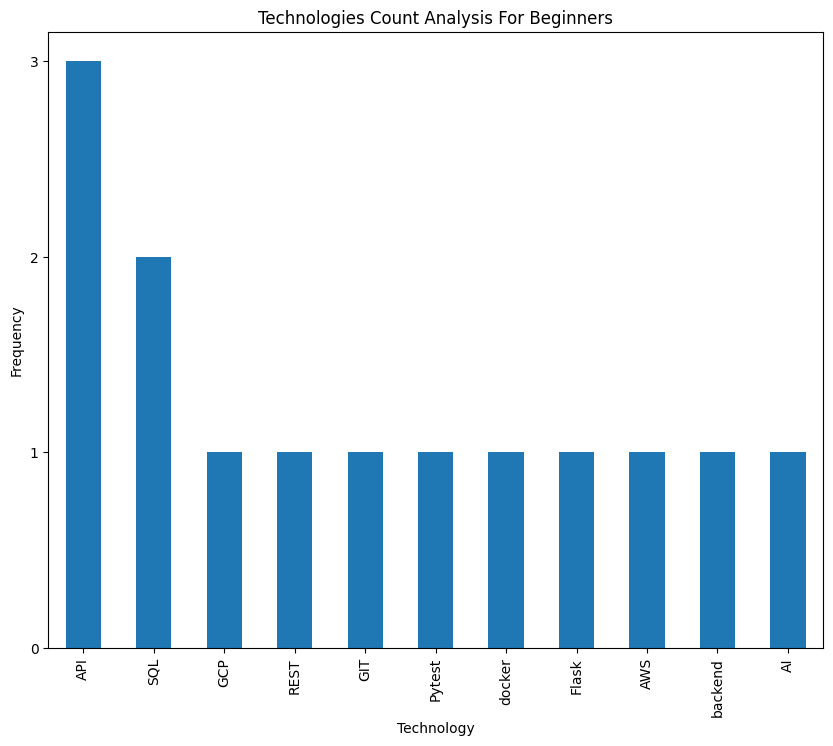

In [9]:
beginner_list = df.loc[df["experience"] == "< 1 року", "technologies"].str.split(", ")
beginner_count = pd.Series(np.concatenate(beginner_list.iloc[:].values)).value_counts()

technologies_data = beginner_count.sort_values(ascending=False)
technologies_data.plot(kind="bar", figsize=(10, 8))

plt.title("Technologies Count Analysis For Beginners")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.yticks(np.arange(0, max(beginner_count) + 1, step=1))
plt.xticks()

plt.show()

# Analysis for 1 - 3 years of experience

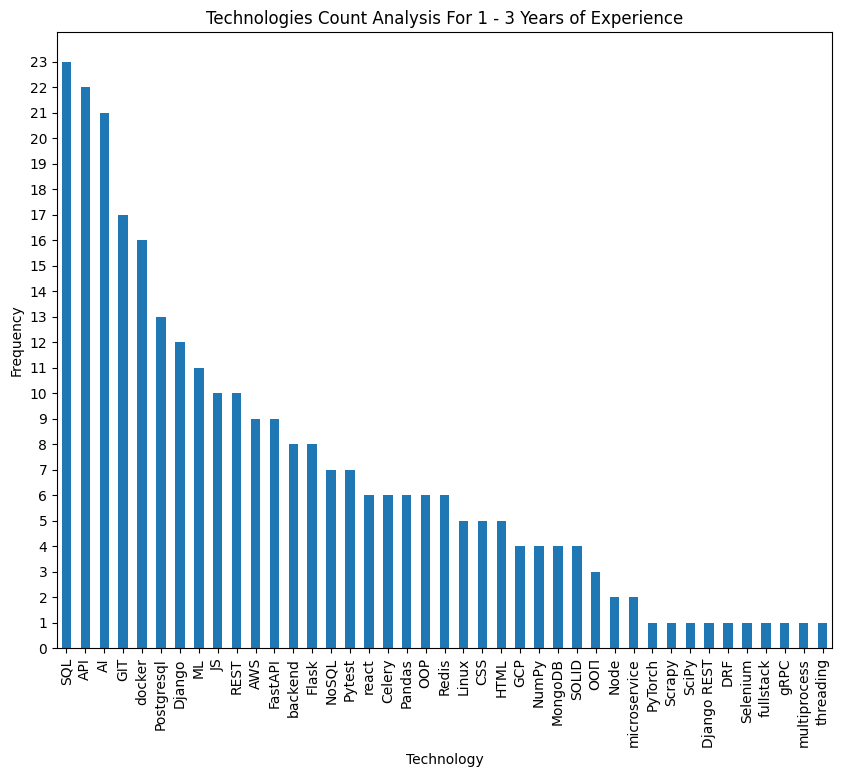

In [10]:
from_one_to_three_list = df.loc[df["experience"] == "1…3 роки", "technologies"].str.split(", ")
from_one_to_three_count = pd.Series(np.concatenate(from_one_to_three_list.iloc[:].values)).value_counts()

technologies_data = from_one_to_three_count.sort_values(ascending=False)
technologies_data.plot(kind="bar", figsize=(10, 8))

plt.title("Technologies Count Analysis For 1 - 3 Years of Experience")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.yticks(np.arange(0, max(from_one_to_three_count) + 1, step=1))
plt.xticks()

plt.show()

# Analysis for 3 - 5 years of experience

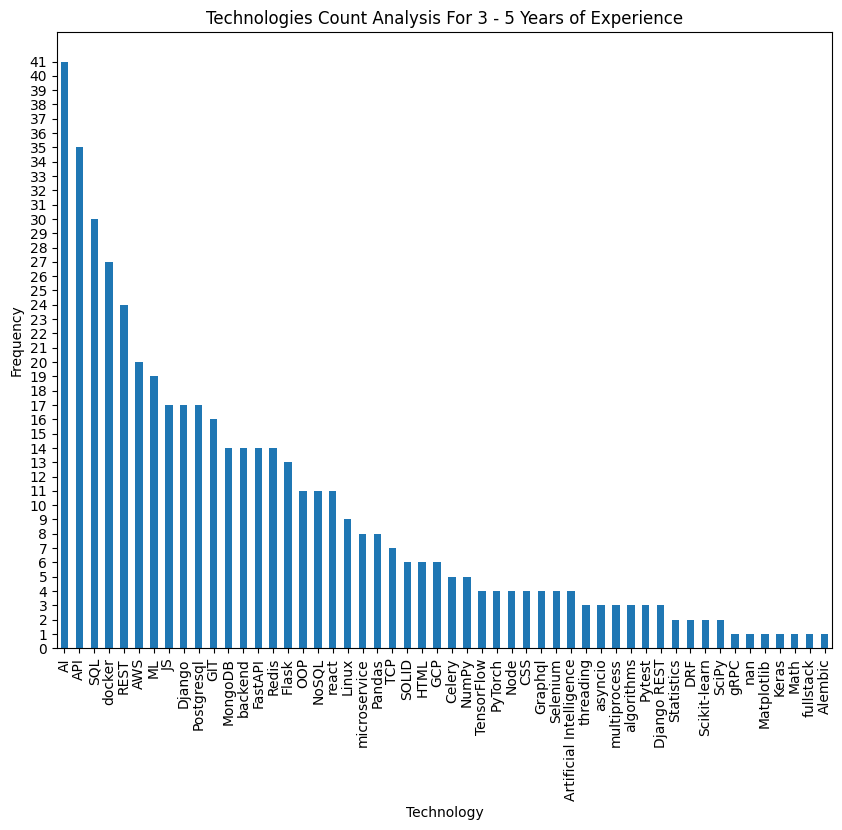

In [11]:
from_three_to_five_list = df.loc[df["experience"] == "3…5 років", "technologies"].str.split(", ")
from_three_to_five_count = pd.Series(np.concatenate(from_three_to_five_list.iloc[:].values)).value_counts()

technologies_data = from_three_to_five_count.sort_values(ascending=False)
technologies_data.plot(kind="bar", figsize=(10, 8))

plt.title("Technologies Count Analysis For 3 - 5 Years of Experience")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.yticks(np.arange(0, max(from_three_to_five_count) + 1, step=1))
plt.xticks()

plt.show()

# Analysis for over 5 years of experience

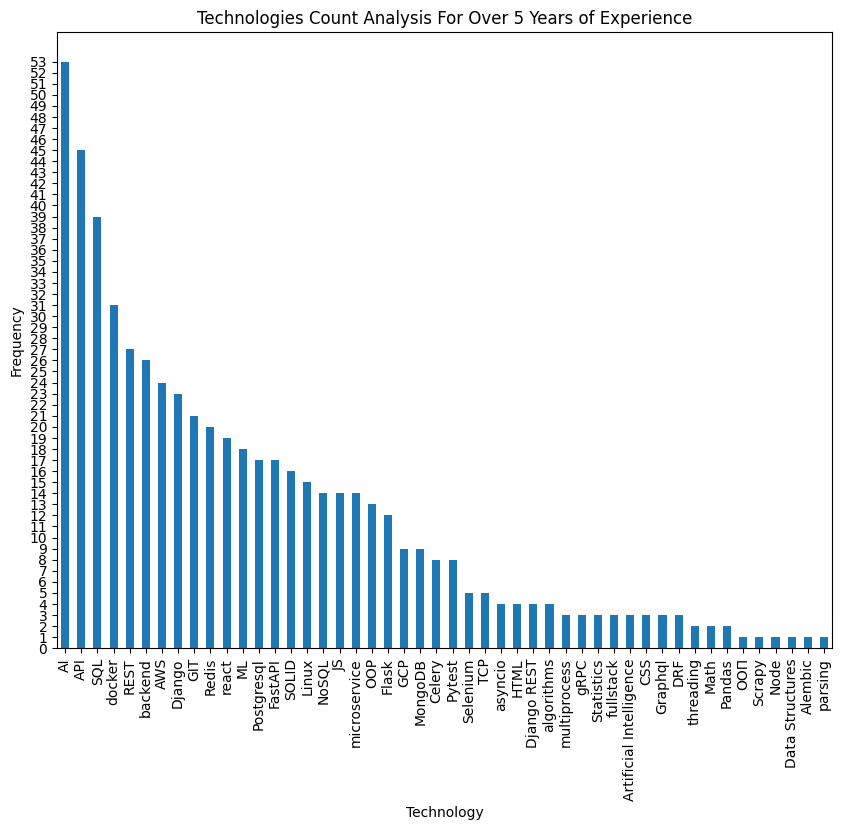

In [12]:
over_five_years_list = df.loc[df["experience"] == "5+ років", "technologies"].str.split(", ")
over_five_years_count = pd.Series(np.concatenate(over_five_years_list.iloc[:].values)).value_counts()

technologies_data = over_five_years_count.sort_values(ascending=False)
technologies_data.plot(kind="bar", figsize=(10, 8))

plt.title("Technologies Count Analysis For Over 5 Years of Experience")
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.yticks(np.arange(0, max(over_five_years_count) + 1, step=1))
plt.xticks()

plt.show()

# Analisis difference between the number of vacancies depending on experience

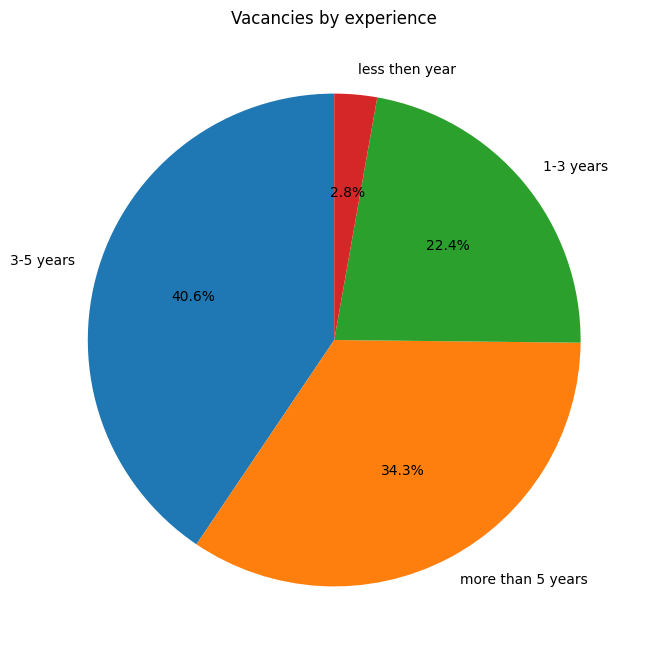

In [13]:
experience_list = ["less then year", "1-3 years", "more than 5 years", "3-5 years"]
plt.figure(figsize=(8, 8))
plt.pie(
    df["experience"].value_counts(),
    labels=experience_list[::-1],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Vacancies by experience")
plt.show()

# Location analysis

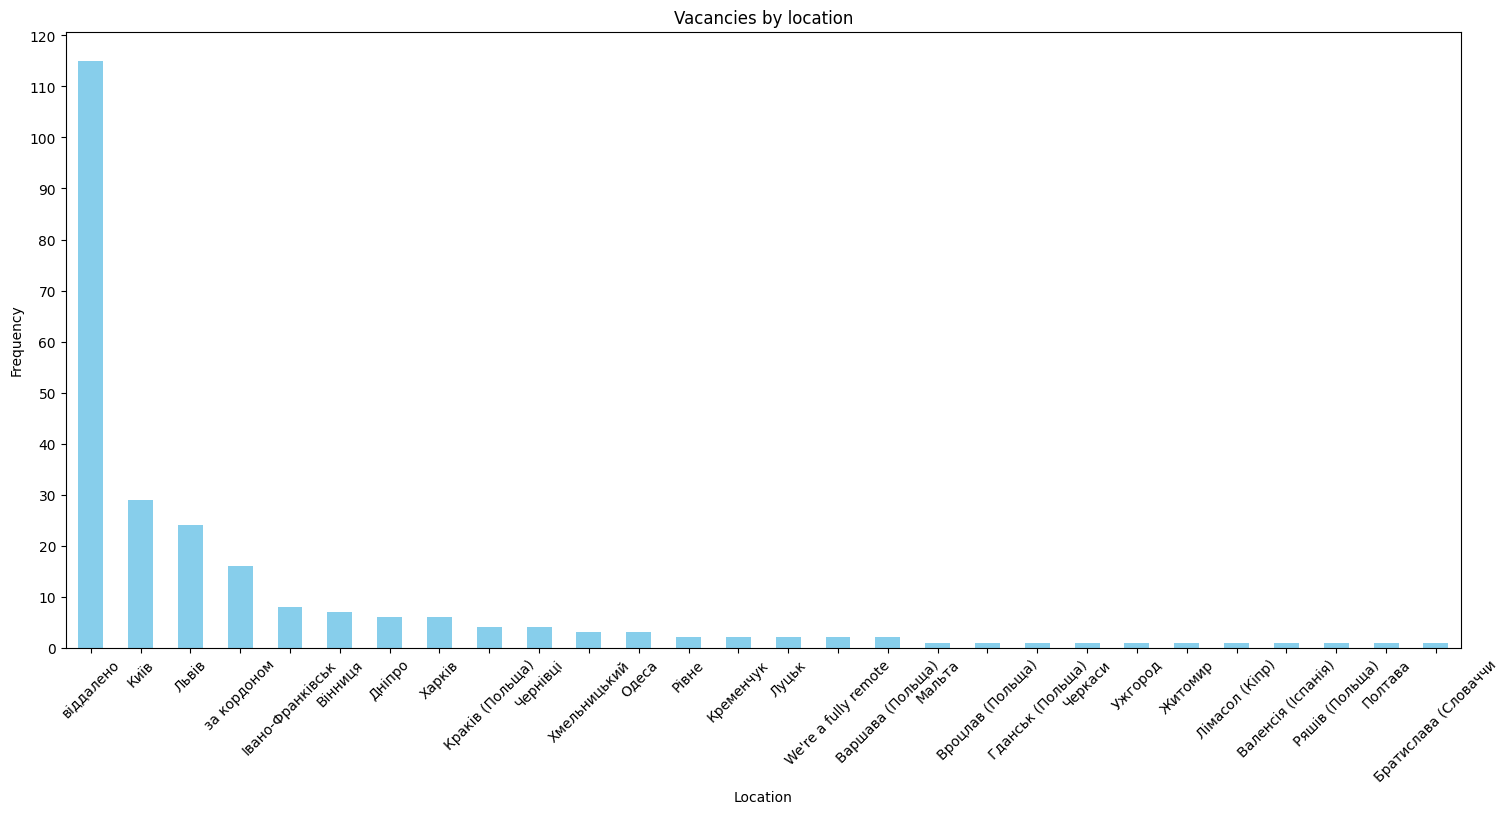

In [16]:
locations_count.index = locations_count.index.str.slice(0, 20)
plt.figure(figsize=(18, 8))
locations_count.plot(kind="bar", color="skyblue")
plt.title("Vacancies by location")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.yticks(np.arange(0, locations_count.max() + 10, step=10))
plt.xticks(rotation=45)
plt.show()